In [114]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [48]:
food = pd.read_csv('food/Food_Supply_kcal_Data.csv', na_values='0')
# food = food.fillna(0)
# food = food.dropna(axis=1)

In [49]:
food.tail()

Country  Alcoholic Beverages  Animal Products  \
165  Venezuela (Bolivarian Republic of)               0.8454           7.2303   
166                             Vietnam               0.7150          10.9806   
167                               Yemen                  NaN           3.4667   
168                              Zambia               1.1925           3.3043   
169                            Zimbabwe               1.4269           3.9356   

     Animal fats  Aquatic Products, Other  Cereals - Excluding Beer    Eggs  \
165       0.6007                      NaN                   21.3126  0.2892   
166       0.9363                      NaN                   26.9833  0.2894   
167       0.3394                      NaN                   32.0727  0.1455   
168       0.3230                      NaN                   31.5528  0.1988   
169       0.6904                      NaN                   29.8044  0.1381   

     Fish, Seafood  Fruits - Excluding Wine    Meat  ...  Vegetable Oils  \
165         0.4449                   2.3804  3.1368  ...          7.5417   
166         1.0385                   1.8046  7.8311  ...          1.3279   
167         0.1697                   1.1879  2.0121  ...          3.9515   
168         0.5714                   0.2236  1.5155  ...          3.0062   
169         0.1611                   0.4373  1.7491  ...          6.2601   

     Vegetables  Obesity  Undernourished  Confirmed    Deaths  Recovered  \
165      0.6674     25.2            21.2   0.452585  0.004287   0.424399   
166      1.9578      2.1             9.3   0.002063  0.000036   0.001526   
167      0.3636     14.1            38.9   0.007131  0.002062   0.004788   
168      0.4472      6.5            46.7   0.334133  0.004564   0.290524   
169      0.2532     12.3            51.3   0.232033  0.008854   0.190964   

       Active  Population  Unit (all except Population)  
165  0.023899  28645000.0                             %  
166  0.000501  96209000.0                             %  
167  0.000282  29826000.0                             %  
168  0.039045  18384000.0                             %  
169  0.032214  14863000.0                             %  

[5 rows x 32 columns]

In [50]:
food.dtypes

Country                          object
Alcoholic Beverages             float64
Animal Products                 float64
Animal fats                     float64
Aquatic Products, Other         float64
Cereals - Excluding Beer        float64
Eggs                            float64
Fish, Seafood                   float64
Fruits - Excluding Wine         float64
Meat                            float64
Milk - Excluding Butter         float64
Miscellaneous                   float64
Offals                          float64
Oilcrops                        float64
Pulses                          float64
Spices                          float64
Starchy Roots                   float64
Stimulants                      float64
Sugar Crops                     float64
Sugar & Sweeteners              float64
Treenuts                        float64
Vegetal Products                float64
Vegetable Oils                  float64
Vegetables                      float64
Obesity                         float64


32 features are definitely too much for k-means. Look mor einto the columns and then maybe .. how about PCA?

In [65]:
# find the features with missing values
cols_with_missing = food.isna().sum().sort_values(ascending=False)[:17].index.values.tolist()

In [66]:
# look at those features
food[cols_with_missing].describe()

Aquatic Products, Other  Sugar Crops  Miscellaneous    Treenuts  \
count                 4.000000    20.000000     148.000000  150.000000   
mean                  0.118425     0.151955       0.183009    0.296501   
std                   0.188300     0.154774       0.222619    0.286573   
min                   0.018500     0.005200       0.014800    0.016400   
25%                   0.020300     0.048900       0.046150    0.084250   
50%                   0.027250     0.114200       0.105650    0.201750   
75%                   0.125375     0.169325       0.229200    0.420600   
max                   0.400700     0.593000       1.182200    1.421000   

           Spices      Deaths      Active   Recovered  Alcoholic Beverages  \
count  152.000000  156.000000  159.000000  160.000000           160.000000   
mean     0.204897    0.041389    0.545255    1.488665             1.408022   
std      0.242377    0.049111    1.339743    1.937729             1.040309   
min      0.014200    0.000035    0.000055    0.000306             0.019400   
25%      0.048275    0.002681    0.013139    0.108454             0.584500   
50%      0.101500    0.014558    0.093604    0.494358             1.377950   
75%      0.270300    0.073132    0.367714    2.662680             2.050050   
max      1.220200    0.185428    8.019819    9.039871             5.157400   

           Pulses   Confirmed  Stimulants      Offals     Obesity  \
count  164.000000  164.000000  167.000000  167.000000  167.000000   
mean     1.149456    2.021972    0.310860    0.143757   18.707784   
std      1.207336    2.360454    0.312237    0.109136    9.633557   
min      0.015800    0.000312    0.016400    0.013300    2.100000   
25%      0.327625    0.140976    0.081950    0.079000    8.500000   
50%      0.733800    1.011570    0.208300    0.118800   21.200000   
75%      1.578600    3.487069    0.423900    0.179550   25.700000   
max      7.563800   10.408199    2.009000    0.801500   45.600000   

       Animal fats  Fish, Seafood  
count   168.000000     169.000000  
mean      1.282508       0.635237  
std       1.283827       0.578668  
min       0.040800       0.021100  
25%       0.382675       0.242400  
50%       0.908950       0.478700  
75%       1.776900       0.870700  
max       7.800700       4.418300

'Aquatic..' and 'Sugar ..' have almost no data, so they should probably be dropped. The rest have at least 85% of data, so an idea would still be dropping them, but they do look relevant, so one could try to fill them with median values, or imputation, or going ahead with the clustering with only complete data and then assign the ones with missing information to the nearest cluster centers. Not sure which way to go yet.

In [68]:
# fill with medians approach
food = food.fillna(food.median())

In [106]:
# principal component analysis. 
from sklearn.decomposition import PCA

features = [f for f in food.columns[1:-1] if f not in ['Undernourished', 'Aquatic Products, Other', 'Population', 'Sugar Crops']]
#features.remove('Undernourished').remove('Aquatic Products, Other')

pca = PCA(n_components=10)
_ = pca.fit_transform(food[features])
with np.printoptions(precision=4, suppress=True):
    print('explained variance:', pca.explained_variance_ratio_)

explained variance: [0.6183 0.1508 0.1112 0.0276 0.0249 0.0153 0.0109 0.0103 0.0084 0.0072]


The first six components together cover about 95% of total variance, so six input dimensions shall be the way to go for clustering here.

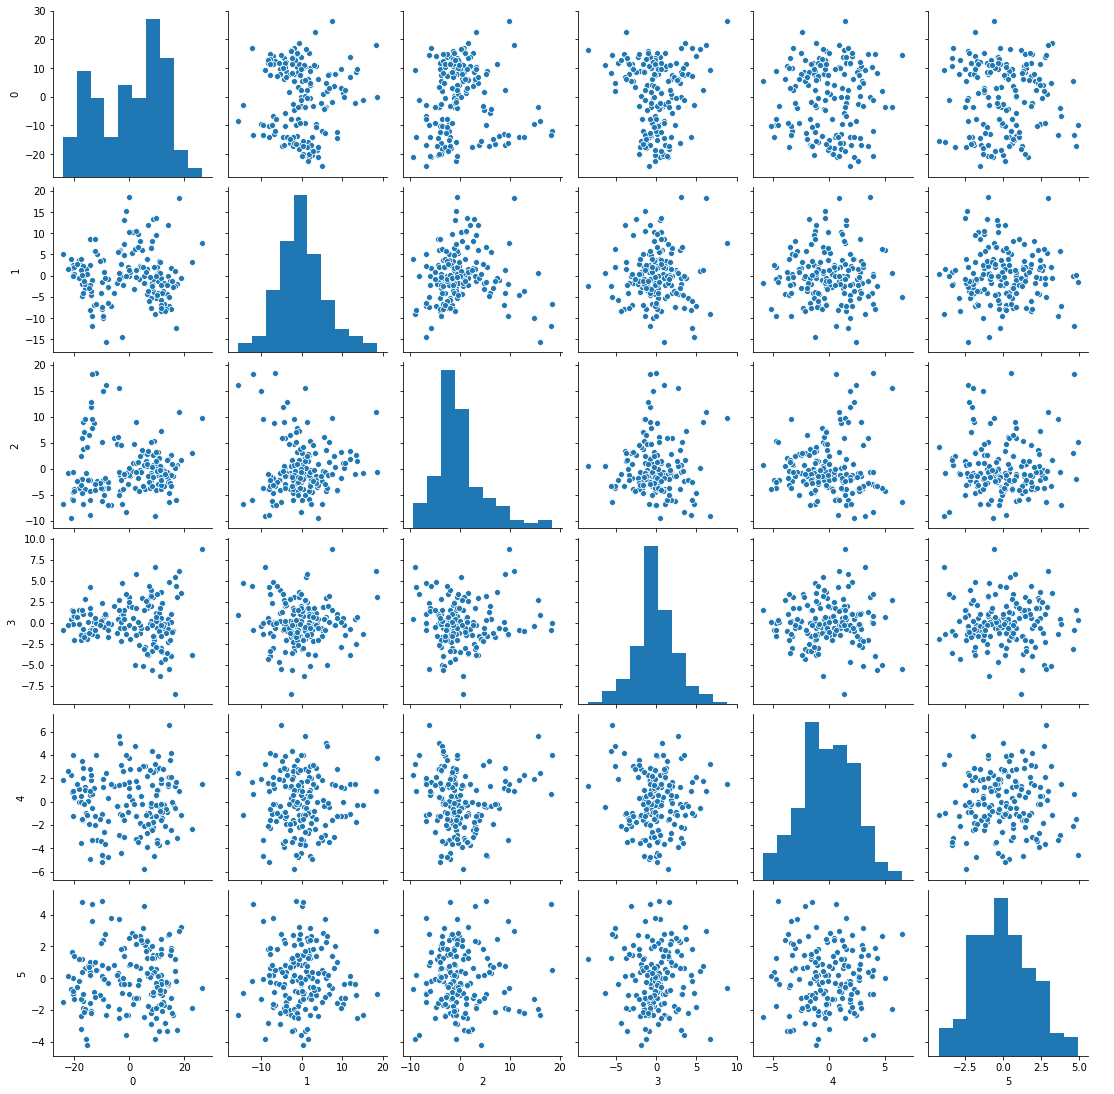

In [71]:
pca = PCA(n_components=6)
food_pca = pca.fit_transform(food[features])

sns.pairplot(pd.DataFrame(food_pca))

In [72]:
# check if basic method works
kmeans = KMeans(n_clusters=16, random_state=0).fit(food_pca)
print(kmeans.labels_)

[15  3  2  4  8  0  7  0  3 12  0 15  7  0  3  7  4 12 12  6  3  7 15  6
 15  4  0 10 15  7  5  7 10  7  4  3  7  8  0  3  1  0  7 12  2  2  3  6
 15  9  3  3  8 13  1  2  3 10  0  8  2  1  1 12 13  2  0  3 15 15  2  2
  0  0  7  7  5  9  8 15 11  1  5  9 12 15  3  9  1  1  3  3 15  4  6  5
 15  0  6  6  7  8  3  2  4  5 13 15  3  8  0  2 15  4  7  8  7  5  7 13
 13 15  3  3 12  7  7 10  8  8  7 14  6  9  1  7  1  3  3 13  2  0 15  6
  2  3  3  8  6  6 15  4  7  2  9 12  4  7  9  0  4  0  7 12 13  2  5  1
 15  1]


In [73]:
def get_indices(data):

    # dunn index not in sklearn, found at https://github.com/jqmviegas/jqm_cvi
    from dunn import dunn, dunn_fast

    indices = pd.DataFrame(columns=['number', 'Calinski-Harabasz', 'Davies-Bouldin', 'Silhouette', 'Dunn', 'Distances'])

    for i in range(2, 10):

        kmeans = KMeans(n_clusters=i, random_state=0).fit(data)

        ch = metrics.calinski_harabaz_score(data, kmeans.labels_)
        db = metrics.davies_bouldin_score(data, kmeans.labels_)
        si = metrics.silhouette_score(data, kmeans.labels_)
        dn = dunn_fast(data, kmeans.labels_)
        di = kmeans.inertia_

        indices = indices.append({'number': i,
                                  'Calinski-Harabasz': ch,
                                  'Davies-Bouldin': db,
                                  'Silhouette': si,
                                  'Dunn': dn, 
                                  'Distances': di}, 
                                 ignore_index=True)
        
    return indices

In [74]:
indices = get_indices(food_pca)

/opt/tljh/user/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/opt/tljh/user/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/opt/tljh/user/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/opt/tljh/user/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/opt/tljh/user/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divid

In [75]:
indices

number  Calinski-Harabasz  Davies-Bouldin  Silhouette      Dunn  \
0     2.0         175.566566        0.898783    0.441591  0.085436   
1     3.0         136.001710        1.144322    0.334874  0.093036   
2     4.0         127.115985        1.103027    0.338758  0.095548   
3     5.0         114.971129        1.070899    0.324731  0.105293   
4     6.0         106.516711        1.084407    0.308161  0.108675   
5     7.0         100.346376        1.228054    0.261244  0.117514   
6     8.0          91.609500        1.179121    0.260806  0.166004   
7     9.0          87.765022        1.162013    0.248453  0.127843   

      Distances  
0  18187.347942  
1  14148.798337  
2  11280.168217  
3   9820.987734  
4   8756.723152  
5   7924.150823  
6   7501.124025  
7   6937.860997

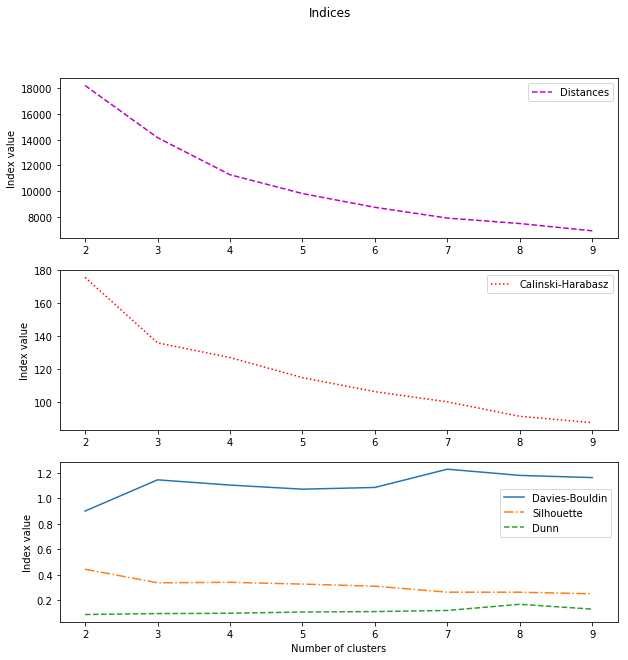

CPU times: user 434 ms, sys: 10.2 ms, total: 444 ms
Wall time: 450 ms


In [76]:
%%time
x = np.array(indices['number'])
Y = np.array(indices[['Calinski-Harabasz', 'Davies-Bouldin', 'Silhouette', 'Dunn', 'Distances']])

fig = plt.figure(figsize=(10, 10))
fig.suptitle('Indices')

ax = fig.add_subplot(3,1,1)
ax.plot(x, Y[:, 4], label='Distances', color='m', linestyle='dashed', linewidth=1.5)
ax.legend()
ax.set_ylabel('Index value')

ax = fig.add_subplot(3,1,2)
ax.plot(x, Y[:, 0], label='Calinski-Harabasz', color='r', linestyle='dotted', linewidth=1.5)
ax.legend()
ax.set_ylabel('Index value')

ax = fig.add_subplot(3,1,3)
ax.plot(x, Y[:, 1], label='Davies-Bouldin', linestyle='solid', linewidth=1.5)
ax.plot(x, Y[:, 2], label='Silhouette', linestyle='dashdot', linewidth=1.5)
ax.plot(x, Y[:, 3], label='Dunn', linestyle='dashed', linewidth=1.5)
ax.legend(bbox_to_anchor=(0.78,0.5))
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Index value')

plt.show()

As almost always, looking at the indices is not perfectly clear, but looking for something akin to the 'elbow rule' there are some agreeing 'kinks' in the graphs at the three cluster mark. So three clusters it is for the rest of this analysis.

In [81]:
# 'final' configuration
kmeans = KMeans(n_clusters=3, random_state=0).fit(food_pca)

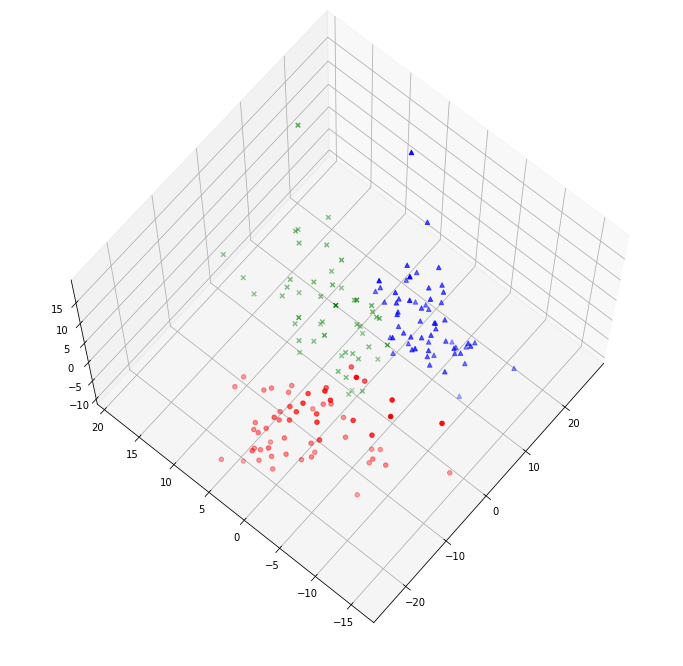

In [102]:
# what does it look like?
# first combine data and labels

def plot_data_3d(n):
    '''n :  number of clusters'''
    labeled_data = np.c_[food_pca, kmeans.labels_]

    fig = plt.figure(figsize=(12, 12))

    # show first angle
    ax = fig.add_subplot(111, projection='3d', azim=220, elev=70)

    for c, m, l in [('r', 'o', 0), ('b', '^', 1), ('g', 'x', 2), ('m', '.', 3), ('y', '*', 4), ('cyan', '+', 5)][0:n]:
        xs = labeled_data[labeled_data[:,-1] == l][:, 0]
        ys = labeled_data[labeled_data[:,-1] == l][:, 1]
        zs = labeled_data[labeled_data[:,-1] == l][:, 2]
        ax.scatter(xs, ys, zs, c=c, marker=m)

#    ax.set_xlabel(customers[['gender', 'income', 'spending_score']].columns[0])
#    ax.set_ylabel(customers[['gender', 'income', 'spending_score']].columns[1])
#    ax.set_zlabel(customers[['gender', 'income', 'spending_score']].columns[2])
    ax.set_title('')

    plt.show()
    
plot_data_3d(3)

In [107]:
from sklearn.manifold import TSNE
X = np.array(food_pca)
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

(170, 2)

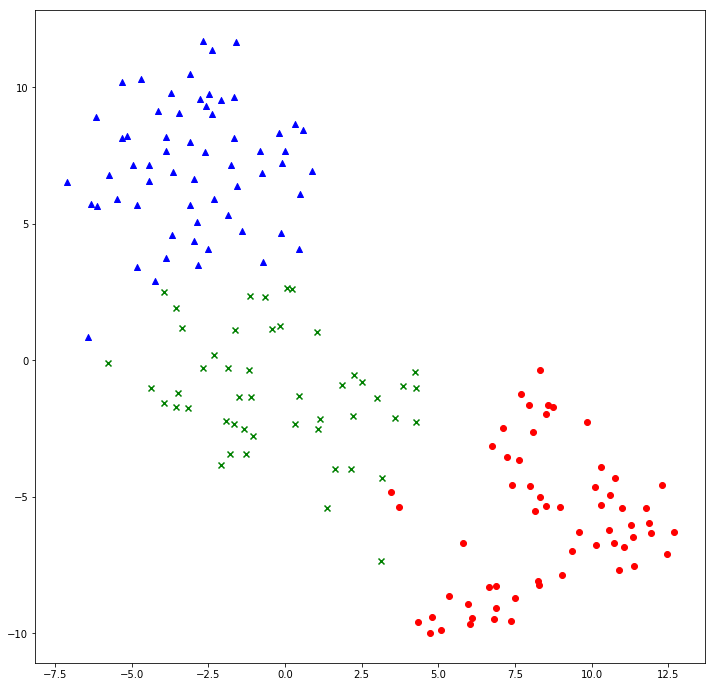

In [116]:
# what does it look like?
# first combine data and labels

def plot_data_3d(n):
    '''n :  number of clusters'''
    labeled_data = np.c_[X_embedded, kmeans.labels_]

    fig = plt.figure(figsize=(12, 12))

    # show first angle
    ax = fig.add_subplot(111)

    for c, m, l in [('r', 'o', 0), ('b', '^', 1), ('g', 'x', 2), ('m', '.', 3), ('y', '*', 4), ('cyan', '+', 5)][0:n]:
        xs = labeled_data[labeled_data[:,-1] == l][:, 0]
        ys = labeled_data[labeled_data[:,-1] == l][:, 1]
        ax.scatter(xs, ys, c=c, marker=m)

#    ax.set_xlabel(customers[['gender', 'income', 'spending_score']].columns[0])
#    ax.set_ylabel(customers[['gender', 'income', 'spending_score']].columns[1])
#    ax.set_zlabel(customers[['gender', 'income', 'spending_score']].columns[2])
    ax.set_title('')

    plt.show()
    
plot_data_3d(3)